In [1]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### *Get Labels from class file*

In [3]:
labels_class_name='./EALPR/EALPR- LP characters dataset/Characters Labeling/classes.txt'
class_labels_dict={}
with open(labels_class_name) as cur: 
    info = cur.readlines() 
    for i in range(len(info)):
        class_labels_dict[info[i][0]] = i
    cur.close()
print(class_labels_dict)
print('classes number:',len(class_labels_dict))

{'أ': 0, 'ب': 1, 'ج': 2, 'د': 3, 'ر': 4, 'س': 5, 'ص': 6, 'ط': 7, 'ع': 8, 'ف': 9, 'ق': 10, 'ل': 11, 'م': 12, 'ن': 13, 'ھ': 14, 'و': 15, 'ى': 16, '٠': 17, '١': 18, '٢': 19, '٣': 20, '٤': 21, '٥': 22, '٦': 23, '٧': 24, '٨': 25, '٩': 26}
classes number: 27


# Prepare **Y**

In [4]:
labels_path='./EALPR/EALPR- LP characters dataset/Characters Labeling'
first_files=os.listdir(labels_path)
os.makedirs('./EALPR/final/plates_img')
os.makedirs('./EALPR/final/plates_labels/')

In [5]:
import shutil
# shutil.rmtree('./EALPR/final/plates_labels')
# shutil.rmtree('./EALPR/final/plates_img')

### **make new file for new img and labels**
        label => shape( ,5)

In [6]:
# # first way
# existing_labels = []
# y_hat = []
# for file in os.listdir(labels_path):
#     if file=='classes.txt':
#         continue
#     file_name = labels_path+'/'+file
#     existing_labels.append(file_name)
#     y_2d = []

#     with open(file_name) as cur:
#             info = cur.readlines()
#             classes_num = []
#             for i in info:  # str
#                     tmp = i.split()  # list of i
#                     classes_num.append(float(tmp[0]))
#                     for i in range(len(tmp)):
#                         tmp[i] = float(tmp[i])
#                     y_2d.append(list(tmp))  # 2d list (7,5) of the labels

# #                         new V

#             for i in range(27):
#                     if float(i) not in classes_num:
#                         y_2d.append([float(i), 0.00, 0.00, 0.00, 0.00])
#             cur.close()

#     # one 2d array for each image and then 3d for all images
#     y_hat.append(y_2d)

# #     print(y_hat)
# #     print('__'*100)


In [7]:
len(os.listdir('./EALPR/final/plates_labels/')),len(os.listdir('./EALPR/final/plates_img/'))

(0, 0)

### main object detection label
        label => shape( ,8,5)

In [8]:
# first way
existing_labels = []
y_hat = []
for file in os.listdir(labels_path):
    if file=='classes.txt':
        continue
    file_name = labels_path+'/'+file
    existing_labels.append(file_name)
    y_2d = []

    with open(file_name) as cur:
            info = cur.readlines()
            classes_num = []
            for i in info:  # str
                    tmp = i.split()  # list of i
                    classes_num.append(float(tmp[0]))
                    for i in range(len(tmp)):
                        tmp[i] = float(tmp[i])
                    y_2d.append(list(tmp[1:]))  # 2d list (7,5) of the labels
#                     y_2d.append(list(tmp))  # 2d list (7,5) of the labels

#                         new V

            for i in range(8):
                    if len(y_2d) <=8 :
#                         if float(i) not in classes_num:
    #                         y_2d.append([float(i), 0.00, 0.00, 0.00, 0.00])
                            y_2d.append([ 0.00, 0.00, 0.00, 0.00])
                    else:
                        break
                    
            cur.close()

    # one 2d array for each image and then 3d for all images
    y_hat.append(y_2d)

#     print(y_hat)
#     print('__'*100)


In [9]:
len(y_hat)
y_hat[1]

[[0.8662790697674418,
  0.7079207920792079,
  0.12790697674418605,
  0.24752475247524752],
 [0.7267441860465116,
  0.698019801980198,
  0.11627906976744186,
  0.24752475247524752],
 [0.5930232558139535,
  0.6732673267326733,
  0.12790697674418605,
  0.25742574257425743],
 [0.12790697674418605,
  0.5891089108910891,
  0.05813953488372093,
  0.36633663366336633],
 [0.23255813953488372,
  0.6188118811881188,
  0.06976744186046512,
  0.36633663366336633],
 [0.3372093023255814,
  0.6237623762376238,
  0.06976744186046512,
  0.3564356435643564],
 [0.438953488372093,
  0.6386138613861386,
  0.06395348837209303,
  0.36633663366336633],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [10]:
print(len(existing_labels))
existing_labels[:10]

1983


['./EALPR/EALPR- LP characters dataset/Characters Labeling/1253_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/1601_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/0034_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/1361_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/0325_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/1588_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/0451_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/1289_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/1429_license_plate_1.txt',
 './EALPR/EALPR- LP characters dataset/Characters Labeling/0669_license_plate_1.txt']

In [11]:
Y= np.array(y_hat, dtype=object)
Y.shape

(1983,)

In [12]:
Y[1]

[[0.8662790697674418,
  0.7079207920792079,
  0.12790697674418605,
  0.24752475247524752],
 [0.7267441860465116,
  0.698019801980198,
  0.11627906976744186,
  0.24752475247524752],
 [0.5930232558139535,
  0.6732673267326733,
  0.12790697674418605,
  0.25742574257425743],
 [0.12790697674418605,
  0.5891089108910891,
  0.05813953488372093,
  0.36633663366336633],
 [0.23255813953488372,
  0.6188118811881188,
  0.06976744186046512,
  0.36633663366336633],
 [0.3372093023255814,
  0.6237623762376238,
  0.06976744186046512,
  0.3564356435643564],
 [0.438953488372093,
  0.6386138613861386,
  0.06395348837209303,
  0.36633663366336633],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

# Prepare *X*

In [13]:
def find_files(filename, search_path):
    result = []
# Waking top-down from the root
    for root, dir, files in os.walk(search_path):
         if filename in files:
                result.append(os.path.join(root, filename))
    return result

In [14]:
filename ='./EALPR/EALPR- LP characters dataset/Characters Labeling/0134_license_plate_1.txt'
def getFilename(filename):
    filename_image =filename.split('/')[4].split('.')[0]+'.png'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
        filename_image =filename.split('/')[4].split('.')[0]+'.jpg'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
        filename_image =filename.split('/')[4].split('.')[0]+'.JPG'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
        filename_image =filename.split('/')[4].split('.')[0]+'.jpeg'
    filepath_image = os.path.join('./EALPR/EALPR- Plates dataset',filename_image)
    return filepath_image
print(getFilename(filename))

./EALPR/EALPR- Plates dataset/0134_license_plate_1.png


In [15]:
images_paths=[]
for file in existing_labels:
    images_paths.append(getFilename(file))
print(len(images_paths))
images_paths[:10]#random check

1983


['./EALPR/EALPR- Plates dataset/1253_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/1601_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/0034_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/1361_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/0325_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/1588_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/0451_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/1289_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/1429_license_plate_1.png',
 './EALPR/EALPR- Plates dataset/0669_license_plate_1.png']

# Checking

In [16]:
file_path = images_paths[0] 
img = cv2.imread(file_path)
h=img.shape[0]
w=img.shape[1]
h,w

(77, 145)

In [17]:
def convert(bx,by,bw,bh):
    xmx=((2*w*bx+w*bw)/2)
    xmn=(2*w*bx-xmx)
    ymx=((2*h*by+h*bh)/2)
    ymn=(2*h*by-ymx)
    return xmn,xmx,ymn,ymx

In [18]:
Y[0]

[[0.7275862068965517,
  0.6363636363636364,
  0.06206896551724138,
  0.36363636363636365],
 [0.28620689655172415,
  0.6168831168831169,
  0.10344827586206896,
  0.37662337662337664],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]


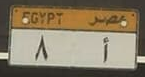

In [19]:
import plotly.express as px 
fig = px.imshow(img)
fig.update_layout(width=224, height=224, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Example')
for i in range(8):
    xmn,xmx,ymn,ymx=convert(float(Y[0][i][0]),float(Y[0][i][1]),float(Y[0][i][2]),float(Y[0][i][3]))
    fig.add_shape(type='rect',x0=xmn, x1=xmx, y0=ymn, y1=ymx, xref='x', yref='y',line_color='red')
fig

# Data Preprocessing

In [20]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# #Targeting all our values in array selecting all columns
# data = []
# output = []
# for ind in range(len(images_paths)):
#     image = image_path[ind]
#     img_arr =cv2.imread(image,cv2.IMREAD_GRAYSCALE)
#     h,w,l = img_arr.shape
#     img_arr = cv2.resize(image_arr ,)
#     # Prepprocesing
# #     load_image = load_img(image,target_size=(h,w))
#     load_image_arr = img_to_array(load_image)
#     norm_load_image_arr = load_image_arr/255.0 # Normalization
#     # Normalization to labels
#     label_norm=[]
#     for num in range(8):
#         xmin,xmax,ymin,ymax = Y[ind][num]
#         nxmin,nxmax = xmin/w,xmax/w
#         nymin,nymax = ymin/h,ymax/h
#         label_norm.append([nxmin,nxmax,nymin,nymax]) # Normalized output
#         # Append
#     data.append(norm_load_image_arr)
#     output.append(np.array(label_norm))

In [21]:
# mine
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
X=[]
for i in range(len(images_paths)):
    image = images_paths[i]
    img_arr =cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    h,w = img_arr.shape
    img_arr= cv2.resize(img_arr,(224,224))
    X.append(img_arr)
    # Prepprocesing
#     load_image_arr = img_to_array(load_image)
#     norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
#     for num in range(8):
#         xmin,xmax,ymin,ymax = Y[ind][num]
#         nxmin,nxmax = xmin/w,xmax/w
#         nymin,nymax = ymin/h,ymax/h
#         label_norm.append([nxmin,nxmax,nymin,nymax]) # Normalized output
        # Append
#     data.append(norm_load_image_arr)
    # Append
#     data.append(norm_load_image_arr)
#     output.append(label_norm)

In [22]:
# label_norm[0],Y[0]

NameError: name 'label_norm' is not defined

In [ ]:
output[0].shape

In [ ]:
type(output)

In [26]:
X = np.array(X,dtype=np.float32)/255.0
y = np.array(y_hat,dtype=np.float32)
X[0]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1983,) + inhomogeneous part.

In [27]:
y.shape, X.shape

((9, 4), (1983, 224, 224))

In [ ]:
y_reshape = y.reshape(-1,27*5)


In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [ ]:


# Split the data into training and testing set using sklearn.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=0)
X_train.shape,X_val.shape ,X_test.shape,y_train.shape,y_val.shape,y_test.shape

In [ ]:
X_train= tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val=tf.convert_to_tensor(X_val, dtype=tf.float32)
y_train=tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val=tf.convert_to_tensor(y_val, dtype=tf.float32)
y_test=tf.convert_to_tensor(y_test, dtype=tf.float32)


X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)


In [ ]:
type(y_train),type(X_val)

# Model Building

In [63]:
cnn = keras.Sequential([
        #     layer input
#             layers.InputLayer(input_shape=(224, 224, 3)),

            # data augmentation
#            tf.keras.layers.RandomContrast(0.1),
        #     layers.RandomFlip("horizontal_and_vertical"),
        #     layers.RandomRotation(0.1),
        #     layers.RandomTranslation(0.2,0.1),
        #     layers.RandomZoom(0.3),
        #     cnn layers
 layers.Conv2D(512, 3,input_shape=( 224, 224,1),  activation='relu'),
      layers.MaxPooling2D(),

  layers.Conv2D(256, (3,3),  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
    layers.Dropout(0.2),
    # dense
    layers.Flatten(),

    layers.Dense(2084,activation='relu'),
        layers.Dense(1024,activation='relu'),
    layers.Dense(1024,activation='relu'),

    layers.Dense(512,activation='relu',name='D1'),
    layers.Dropout(0.15),

    layers.Dense(256, activation='relu',name='D2'),
#     layers.Dense(128, activation='relu',name='D3'), 
#     layers.Dense(64, activation='relu',name='D4'),
    layers.Dense(1,activation='softmax',name='D5'),
    
        ])
cnn.compile(
            optimizer= keras.optimizers.Adam(0.001),
            loss='mse',
            metrics=['accuracy']
        )
cnn.summary()
        


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 512)     5120      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 512)     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 256)     1179904   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 128)       295040    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)       

In [67]:
cnn.fit(
    X_train,y_train,
      validation_data=(X_val,y_val),
    epochs=140, 
#             callbacks = [tensorboard_callback], 
          )


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [52]:
cnn.fit(X_train,y_train,epochs=140, 
#             callbacks = [tensorboard_callback], 
            validation_data=(X_val,y_val))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
x= cnn.predict(X_test[0])
x[0],y_test[0]